In [68]:
import pandas as pd
import numpy as np
import pickle
from nltk.corpus import wordnet, stopwords
# from nltk.tokenize import TweetTokenizer
from pattern.en import lemma,singularize
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import math
from Levenshtein import ratio
importb seaborn as sns

In [2]:
BB = pd.read_csv("../data/Hot Stuff.csv")
df = pickle.loads(open("df_concat.pickle", "rb").read())

In [9]:
df.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,..."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t..."


In [10]:
BB.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/2012-1...,12/15/2012,21,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,28.0,21,11
1,http://www.billboard.com/charts/hot-100/2012-1...,12/22/2012,14,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,21.0,14,12
2,http://www.billboard.com/charts/hot-100/2012-1...,12/29/2012,12,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,14.0,12,13
3,http://www.billboard.com/charts/hot-100/2013-0...,1/5/2013,11,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,12.0,11,14
4,http://www.billboard.com/charts/hot-100/2013-0...,1/12/2013,15,Don't You Worry Child,Swedish House Mafia Featuring John Martin,Don't You Worry ChildSwedish House Mafia Featu...,1,11.0,11,15


In [42]:
BB_Song = BB.groupby(["Performer", "Song"]).agg({"WeekID": np.min}).reset_index()
BB_Song["WeekID"] = pd.to_datetime(BB_Song["WeekID"])
BB_Song["MonthID"] = [i.year + (i.month - 1)/12 for i in BB_Song["WeekID"]]
BB_Song["Performer"] = [i.lower() for i in BB_Song["Performer"]]
BB_Song["Song"] = [i.lower() for i in BB_Song["Song"]]

In [53]:
df = df.merge(BB_Song, left_on=["song", "artist"], right_on=["Song", "Performer"], how="left")

In [54]:
df.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,Performer,Song,WeekID,MonthID
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...",lil uzi vert,sauce it up,2017-10-14,2017.750000
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...",granger smith,backroad song,2016-01-16,2016.000000
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...",boston,feelin' satisfied,1979-03-24,1979.166667
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...",bobby russell,saturday morning confusion,1971-10-02,1971.750000
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...",luke bryan,country man,2008-10-11,2008.750000


## Plot Scraped Sizes with BillBoard

In [55]:
BB_year_count_df = BB_Song.groupby(lambda x: BB_Song.loc[x, "WeekID"].year).count()["Song"]

In [73]:
year_count_df = df.groupby(lambda x: df.loc[x, "WeekID"].year).apply(lambda x: x.count())
g_year = year_count_df["genius_raw"]
azl_year = year_count_df["az_lyrics_raw"]
laz_year = year_count_df["lyrics_az_raw"]
insec = year_count_df["word_intersect"]

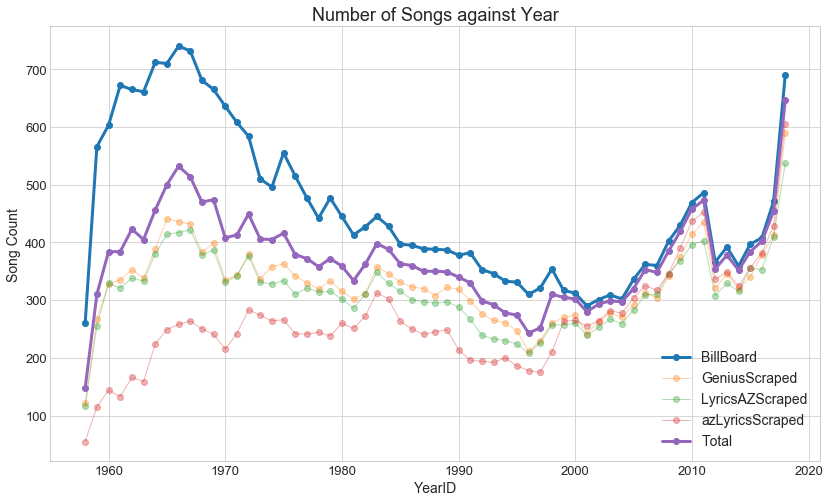

In [99]:
plt.figure(figsize=(13.8, 8))
sns.set_style("whitegrid")
plt.plot(list(BB_year_count_df.index), list(BB_year_count_df), "-o", label="BillBoard", linewidth=3.0)
plt.plot(list(g_year.index), list(g_year), "-o", label="GeniusScraped", linewidth=1.0, alpha=0.35)
plt.plot(list(laz_year.index), list(laz_year), "-o", label="LyricsAZScraped", linewidth=1.0, alpha=0.35)
plt.plot(list(azl_year.index), list(azl_year), "-o", label="azLyricsScraped", linewidth=1.0, alpha=0.35)
plt.plot(list(insec.index), list(insec), "-o", label="Total", linewidth=3.0)
plt.xlabel("{}ID".format("Year"), fontsize=14)
plt.ylabel("Song Count", fontsize=14)
plt.legend(fontsize=14)
plt.title("Number of Songs against {}".format("Year"), fontsize=18)
plt.tick_params(labelsize=13)
plt.show()

In [92]:
[sum(g_year), sum(azl_year), sum(laz_year)]

[20041, 16117, 19202]

In [91]:
sum(BB_year_count_df)

27949

In [141]:
27949 -  16117

11832

## Plot Levenshtein ratio accross dataset

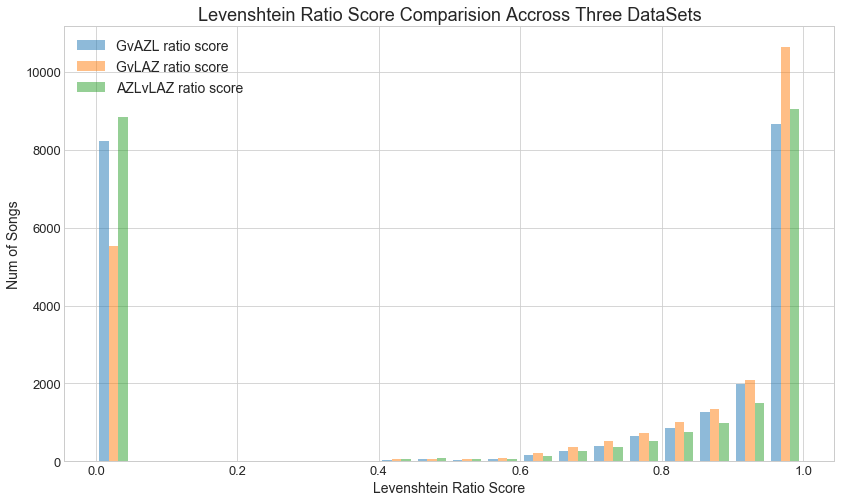

In [100]:
plt.figure(figsize=(13.8, 8))
# for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]:
#     plt.plot(list(range(df.shape[0])), sorted(df[i]), label="{} ratio score".format(i))
plt.hist([df[i] for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]], label=["{} ratio score".format(i) for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]], 
         alpha=0.5, bins=20)
plt.xlabel("Levenshtein Ratio Score", fontsize=14)
plt.ylabel("Num of Songs", fontsize=14)
plt.title("Levenshtein Ratio Score Comparision Accross Three DataSets", fontsize=18)
plt.tick_params(labelsize=13)
plt.legend(fontsize=14)
plt.show()

## Plot Words Count

In [154]:
bag_of_words = pickle.loads(open("bag_of_words_concat.pickle", "rb").read())

In [180]:
bag_of_words.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


In [155]:
bag_of_words.shape

(39300, 3)

In [157]:
from sklearn.cluster import KMeans

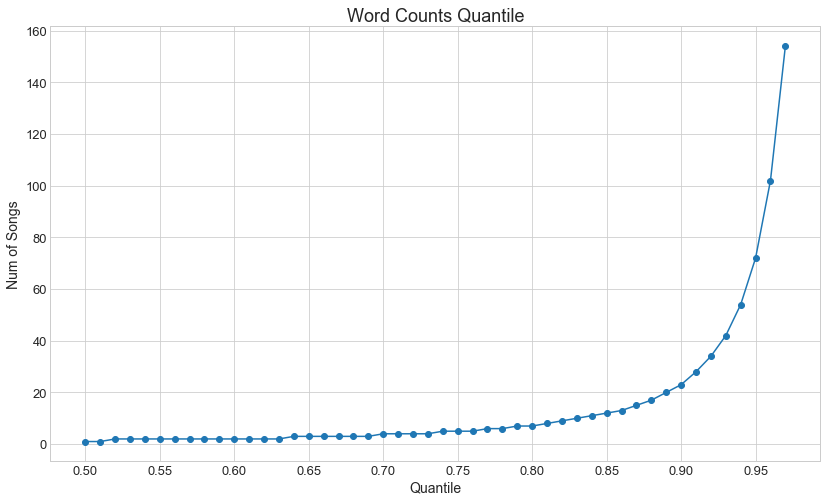

In [173]:
plt.figure(figsize=(13.8, 8))
# for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]:
#     plt.plot(list(range(df.shape[0])), sorted(df[i]), label="{} ratio score".format(i))
plt.plot([i / 100 for i in range(50, 98, 1)], [np.quantile(bag_of_words["songcount"], i/100) for i in range(50, 98, 1)], 
         "-o")
plt.xlabel("Quantile", fontsize=14)
plt.ylabel("Num of Songs", fontsize=14)
plt.title("Word Counts Quantile", fontsize=18)
plt.tick_params(labelsize=13)
plt.xticks([i / 100 for i in range(50, 98, 5)])
plt.show()

In [192]:
def KMWordCluster(df, n_cluster):
    data = df[["wordcount", "songcount"]]
    labels = df["word"]
    word_cluster = KMeans(n_clusters=n_cluster, random_state=48, n_init=100).fit(data)
    pred_clusters = word_cluster.labels_
    print(Counter(pred_clusters))
    cluster_labels=[[] for i in range(n_cluster)]
    for i, j in enumerate(pred_clusters):
        cluster_labels[j].append(labels[i])
    plt.figure(figsize=(13.8, 6))
    for i in range(n_cluster):
        plt.scatter(df[df["word"].isin(cluster_labels[i])]["wordcount"], df[df["word"].isin(cluster_labels[i])]["songcount"], label="{}".format(i), alpha=0.5)
    plt.legend(fontsize=14)
    plt.xlabel("WordCount", fontsize=14)
    plt.ylabel("SongCount", fontsize=14)
    plt.tick_params(labelsize=13)
    plt.title("Word KM Clustering Results(K={})".format(n_cluster), fontsize=16)
    plt.show()

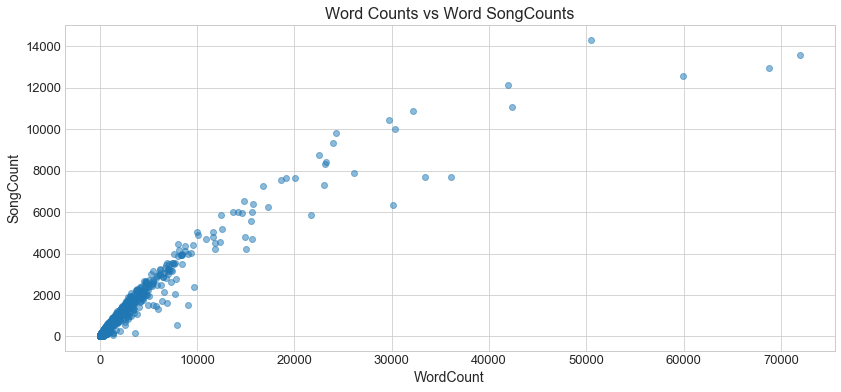

In [210]:
plt.figure(figsize=(13.8, 6))
plt.scatter(bag_of_words["wordcount"], bag_of_words["songcount"], alpha=0.5)
plt.xlabel("WordCount", fontsize=14)
plt.ylabel("SongCount", fontsize=14)
plt.tick_params(labelsize=13)
plt.title("Word Counts vs Word SongCounts", fontsize=16)
plt.show()

Counter({0: 39192, 2: 96, 1: 12})


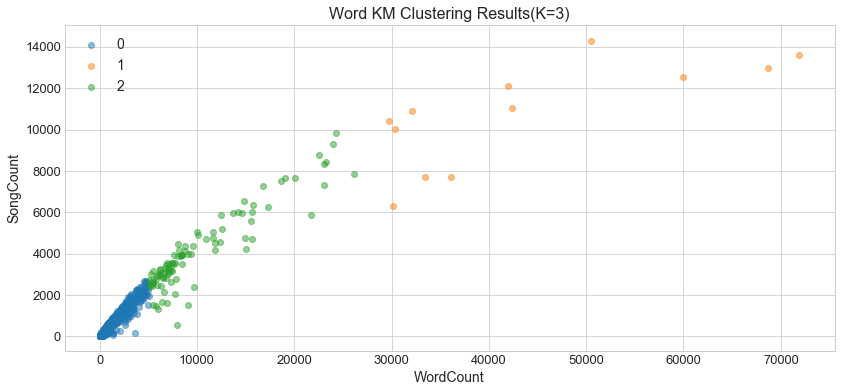

Counter({0: 39073, 3: 192, 2: 29, 1: 6})


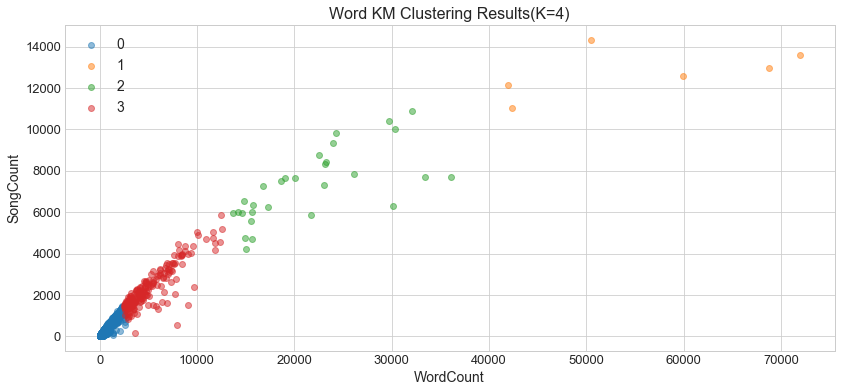

Counter({0: 38945, 4: 265, 2: 67, 1: 19, 3: 4})


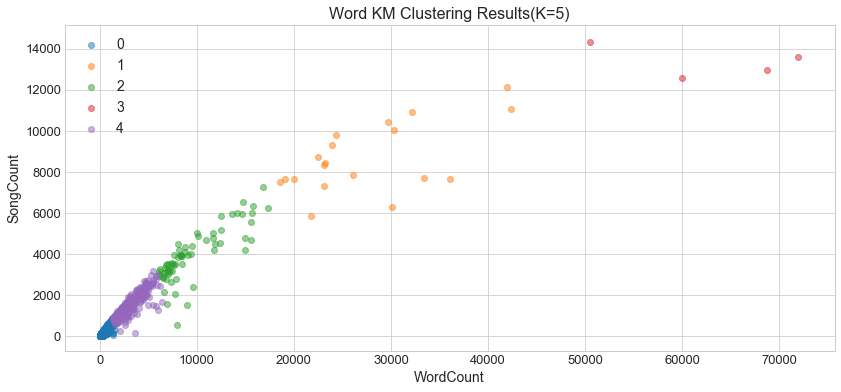

Counter({0: 38921, 4: 271, 3: 73, 1: 23, 5: 8, 2: 4})


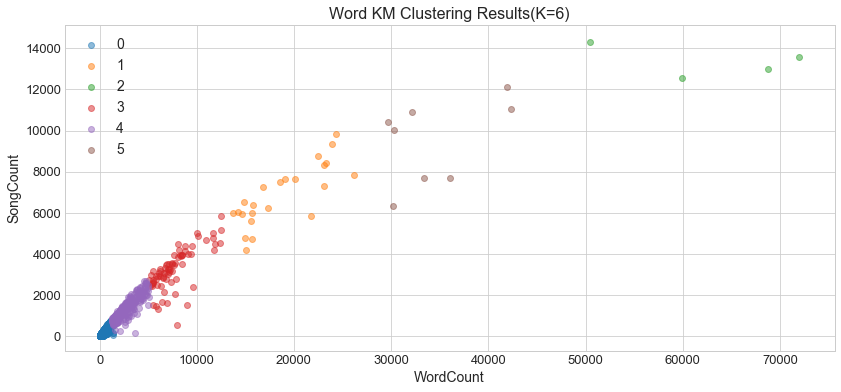

Counter({0: 38883, 3: 288, 4: 86, 6: 23, 1: 13, 5: 4, 2: 3})


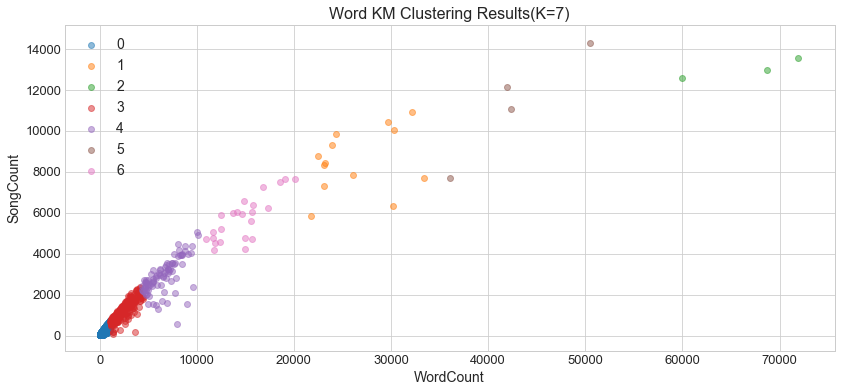

Counter({5: 38493, 0: 541, 7: 161, 3: 62, 4: 23, 1: 13, 6: 4, 2: 3})


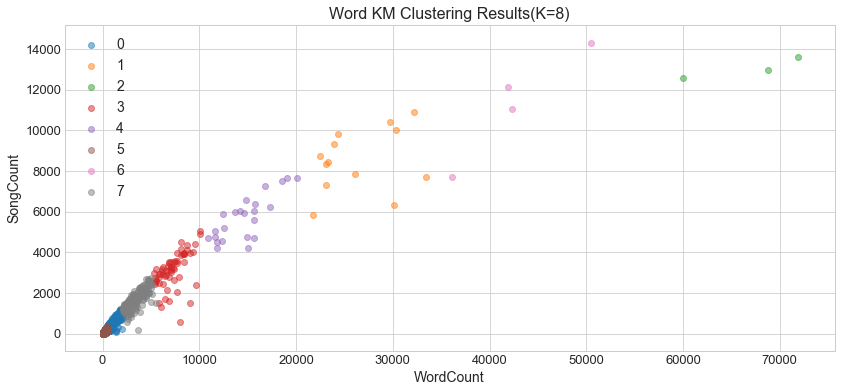

Counter({0: 38497, 7: 537, 2: 161, 6: 62, 3: 20, 8: 11, 1: 6, 5: 3, 4: 3})


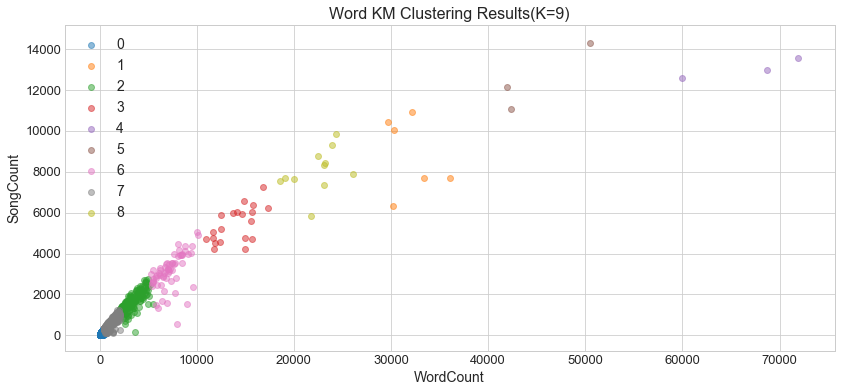

Counter({0: 38272, 9: 664, 6: 176, 2: 93, 8: 52, 4: 20, 7: 11, 1: 6, 5: 3, 3: 3})


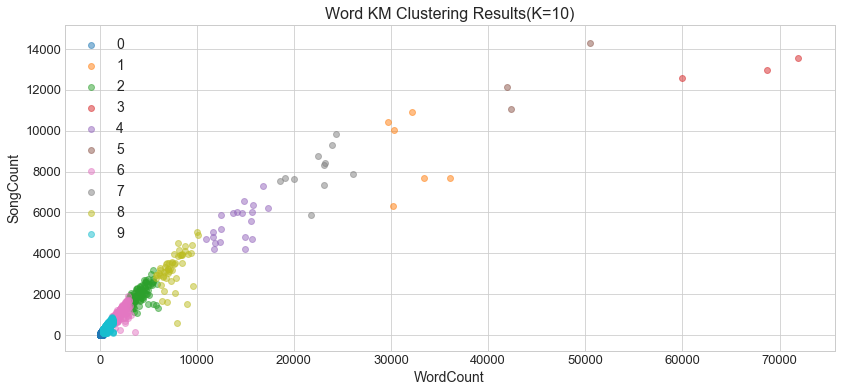

In [193]:
for i in range(3, 11):
    KMWordCluster(bag_of_words, i)

In [208]:
bag_of_words_selected = bag_of_words[(bag_of_words["wordcount"] != 1) & (bag_of_words["wordcount"] <= np.quantile(bag_of_words["wordcount"], 0.95))].reset_index(drop=True)
bag_of_words_selected.shape

(21477, 3)

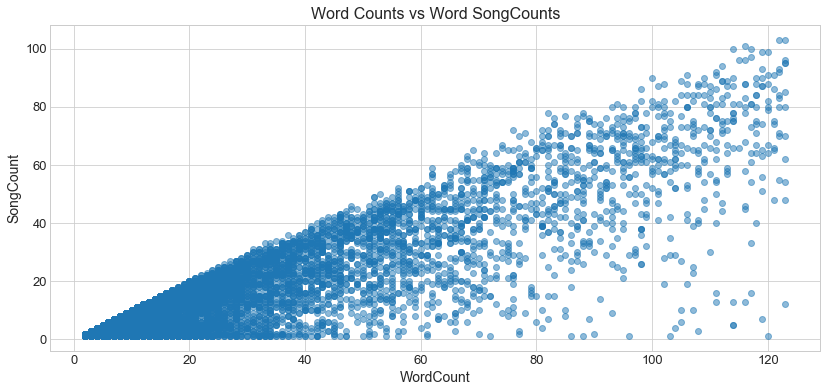

In [209]:
plt.figure(figsize=(13.8, 6))
plt.scatter(bag_of_words_selected["wordcount"], bag_of_words_selected["songcount"], alpha=0.5)
plt.xlabel("WordCount", fontsize=14)
plt.ylabel("SongCount", fontsize=14)
plt.tick_params(labelsize=13)
plt.title("Word Counts vs Word SongCounts", fontsize=16)
plt.show()

Counter({1: 17756, 0: 2753, 2: 968})


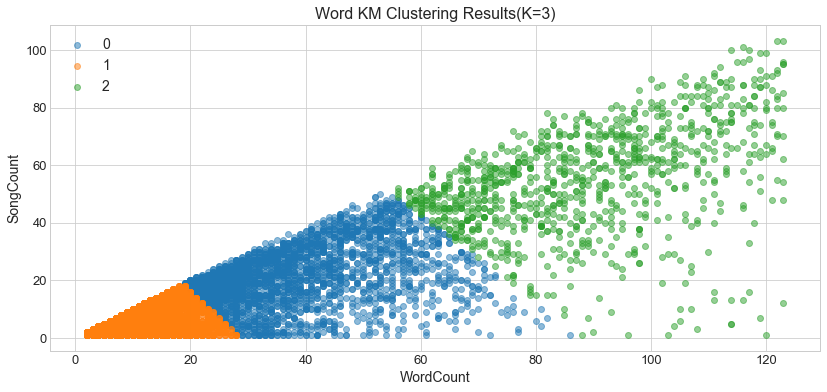

Counter({0: 15847, 2: 3428, 3: 1474, 1: 728})


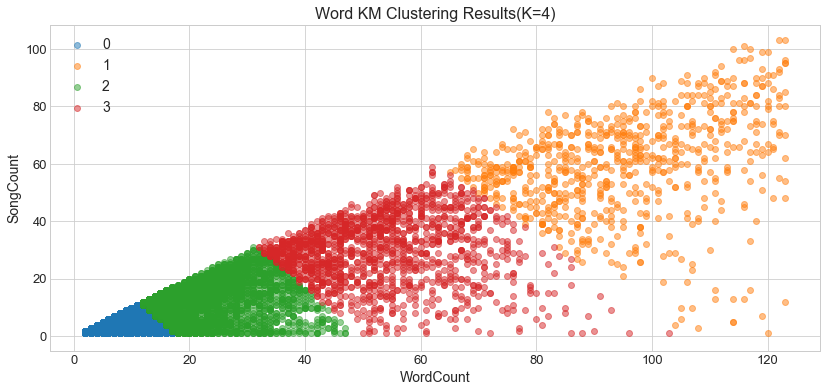

Counter({0: 14577, 4: 3730, 2: 1623, 1: 993, 3: 554})


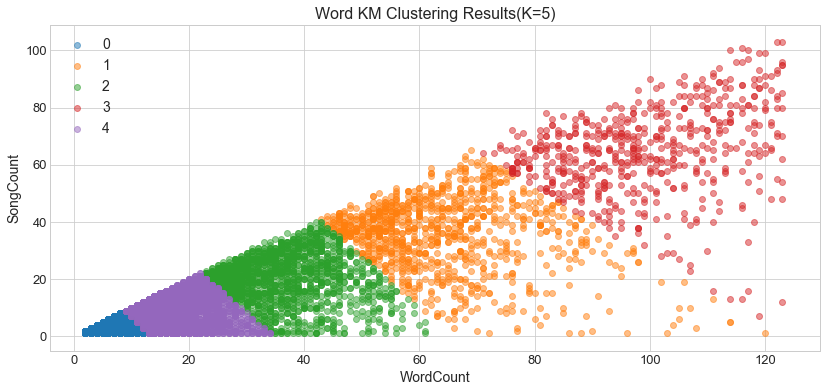

Counter({5: 13677, 1: 4014, 2: 1790, 4: 1072, 0: 542, 3: 382})


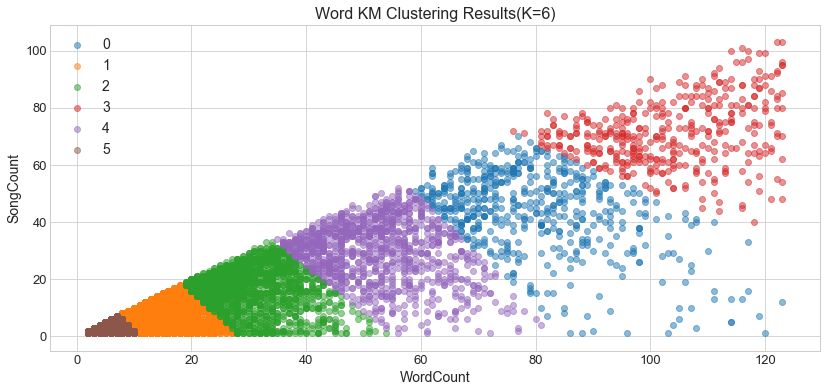

Counter({0: 13515, 5: 3885, 2: 1843, 4: 1057, 1: 531, 3: 413, 6: 233})


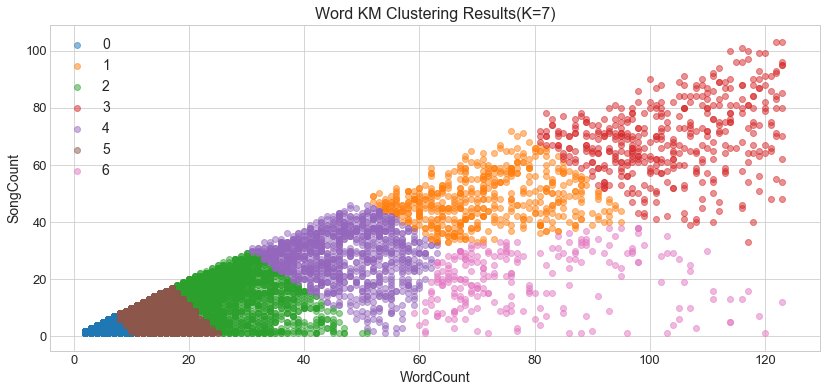

Counter({0: 12843, 4: 4081, 6: 1877, 3: 1063, 1: 664, 7: 409, 2: 317, 5: 223})


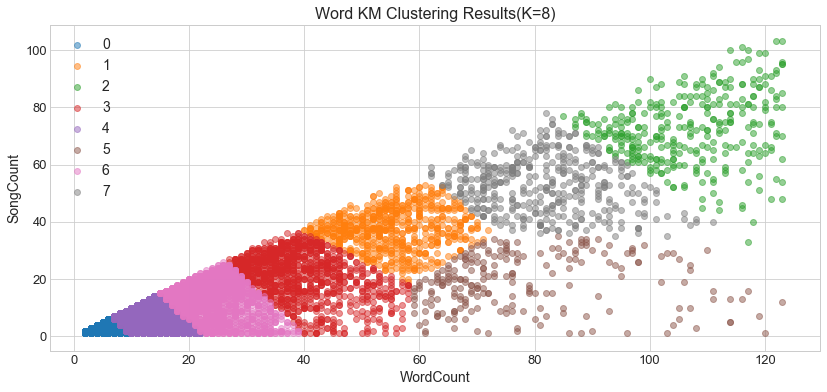

Counter({0: 12843, 6: 4003, 4: 1845, 2: 952, 1: 642, 7: 370, 3: 350, 5: 300, 8: 172})


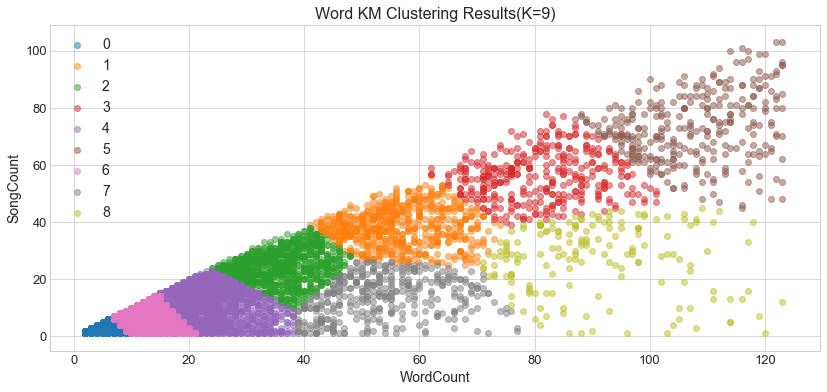

Counter({0: 12843, 4: 3977, 2: 1407, 6: 866, 8: 681, 9: 581, 1: 352, 7: 324, 3: 310, 5: 136})


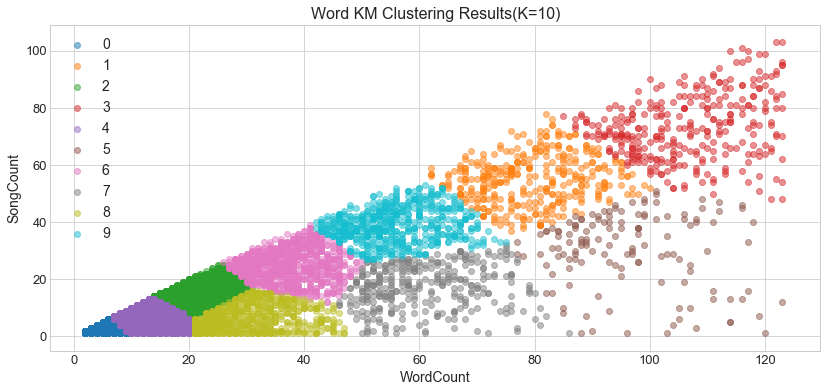

In [211]:
for i in range(3, 11):
    KMWordCluster(bag_of_words_selected, i)

Counter({0: 39192, 2: 96, 1: 12})
Counter({0: 39073, 3: 192, 2: 29, 1: 6})
Counter({0: 38945, 4: 265, 2: 67, 1: 19, 3: 4})


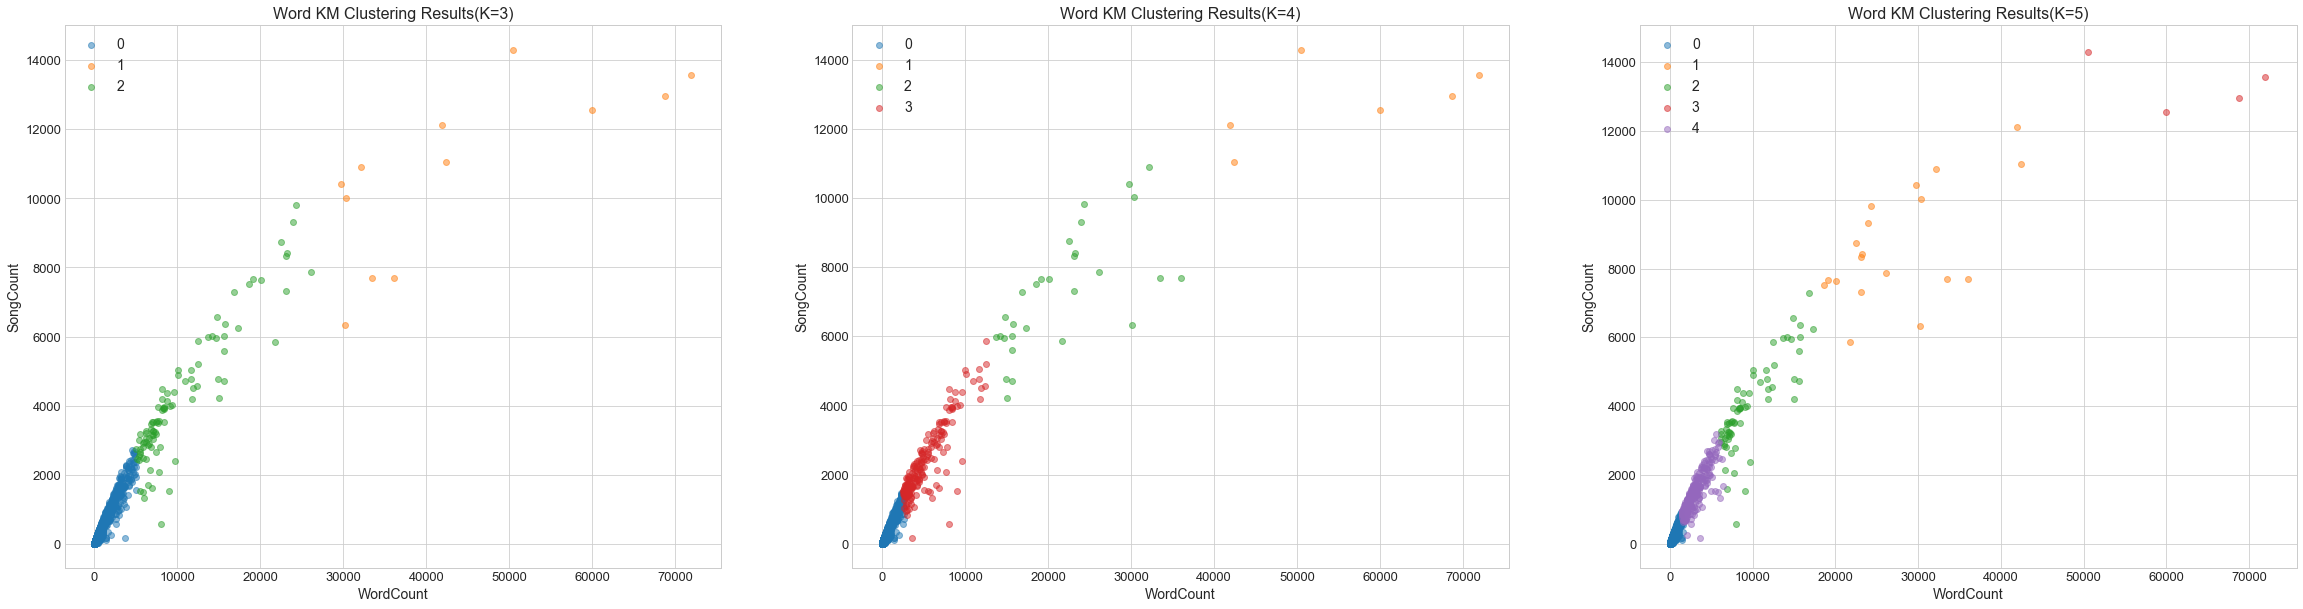

In [216]:
plt.subplots(1, 3, figsize=(40, 10))
for n_cluster in range(3, 6):
    plt.subplot(1, 3, n_cluster%3+1)
    data = bag_of_words[["wordcount", "songcount"]]
    labels = bag_of_words["word"]
    word_cluster = KMeans(n_clusters=n_cluster, random_state=48, n_init=100).fit(data)
    pred_clusters = word_cluster.labels_
    print(Counter(pred_clusters))
    cluster_labels=[[] for i in range(n_cluster)]
    for i, j in enumerate(pred_clusters):
        cluster_labels[j].append(labels[i])
    for i in range(n_cluster):
        plt.scatter(bag_of_words[bag_of_words["word"].isin(cluster_labels[i])]["wordcount"], bag_of_words[bag_of_words["word"].isin(cluster_labels[i])]["songcount"], label="{}".format(i), alpha=0.5)
    plt.legend(fontsize=14)
    plt.xlabel("WordCount", fontsize=14)
    plt.ylabel("SongCount", fontsize=14)
    plt.tick_params(labelsize=13)
    plt.title("Word KM Clustering Results(K={})".format(n_cluster), fontsize=16)
plt.show()

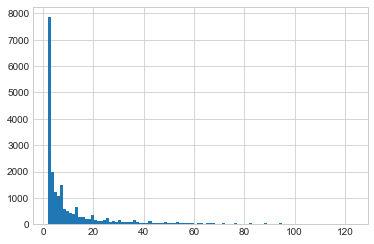

In [223]:
plt.hist(bag_of_words_selected["wordcount"], bins=100)
plt.show()

In [261]:
df.columns

Index(['song', 'artist', 'genius_raw', 'genius_bag', 'az_lyrics_raw',
       'az_lyrics_bag', 'lyrics_az_raw', 'lyrics_az_bag', 'GvAZL', 'GvLAZ',
       'AZLvLAZ', 'genius_counter', 'az_lyrics_counter', 'lyrics_az_counter',
       'word_intersect', 'Performer', 'Song', 'WeekID', 'MonthID',
       'word_intersect_counter'],
      dtype='object')

In [262]:
df.shape[0] - df["az_lyrics_raw"].isnull().sum()

16117

In [269]:
len([i for i in range(df.shape[0]) if not df.loc[i, "az_lyrics_raw"] and  not df.loc[i, "lyrics_az_raw"] and   df.loc[i, "genius_raw"]])

1248

In [228]:
22711 - 2670

20041